In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model

# Types of supervised learning
    Classification: Predict a categorical response
    Regression: Predict a continuous response

In [58]:
data = pd.read_csv('data/Advertising.csv', index_col=0)

feature=['TV','Radio','Newspaper']
X= data[feature]
Y= data['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

print(data.head())
print(data.tail())
print(data.shape)

print(X)
print(Y)



      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
        TV  Radio  Newspaper  Sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4
(200, 4)
        TV  Radio  Newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
6      8.7   48.9       75.0
7     57.5   32.8       23.5
8    120.2   19.6       11.6
9      8.6    2.1        1.0
10   199.8    2.6       21.2
11    66.1    5.8       24.2
12   214.7   24.0        4.0
13    23.8   35.1       65.9
14    97.5    7.6        7.2
15   204.1   32.9       46.0
16   195.4   47.7       52.9
17    67.8   36.6      114.0
18   281.4   39.6       55.8
19    69.2   20.5   

# Visualizing data using seaborn
Seaborn: Python library for statistical data visualization built on top of Matplotlib

Anaconda users: run conda install seaborn from the command line


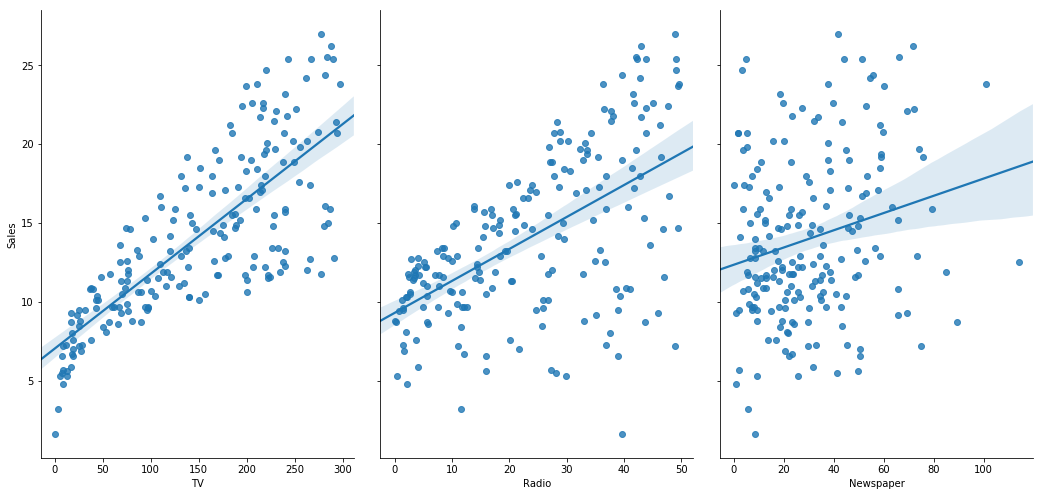

In [59]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7,aspect=0.7, kind='reg')

# Linear regression
__Pros__: fast, no tuning required, highly interpretable, well-understood

__Cons__: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

__Form of linear regression__
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

$y$ is the response
$\beta_0$ is the intercept
$\beta_1$ is the coefficient for $x_1$ (the first feature)
$\beta_n$ is the coefficient for $x_n$ (the nth feature)
In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

In [60]:
lr= linear_model.LinearRegression()
lr.fit(X_train,Y_train)
YPredict = lr.predict(X_test)
print(YPredict)
print(lr.intercept_,lr.coef_)
print(list(zip(feature, lr.coef_)))

[21.75935389 16.33809031  7.63745109 17.53818323 18.44533055 23.69631164
 16.35757645 13.32174877  9.29888886 17.22778955 14.42337872 10.00290799
 17.12037969 16.94530844 14.85121973 15.72525459 12.45868165 16.86598652
 11.43677858 17.97008288  9.34885119 13.17575947  9.05759361 10.49369368
 11.44407166 14.91597281 10.02465801 19.27092122 18.29365658 16.96430184
 21.51490518 14.43483768 16.35517797 12.22942505 19.81723254 15.28387086
 13.69286047 10.00528399 20.94776128  7.70556117  3.80700147  7.24161546
  6.20837682 18.40405093  8.69803622 14.12749368 15.29938376 20.31949892
 20.61959811 19.50910564 23.98271026 14.99816755  6.95559327 19.92910294
 18.65080035 12.3799137  13.92697437  6.30517479 15.07332437  9.83189417
 12.01337633 12.01167681  8.85538071 21.32769068 23.12633826 12.68907096
  6.69065209 17.9661496  16.29648425  9.026378   20.18687816 20.65259527
 24.07534345 10.52786144 10.86843723 16.28405732 10.79545876  6.68370536
 21.23587157 14.4693085 ]
3.0753828167052237 [0.044

How do we interpret the __TV coefficient__ (0.0466)?

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.

__Important notes:__

This is a statement of association, not causation.
If an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

# Model evaluation metrics for regression
Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Three metrics are important as shown below

Comparing these metrics:

* __MAE__ is the easiest to understand, because it's the average error.
* __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
* __RMSE__ is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [61]:
print(np.sqrt(metrics.mean_squared_error(Y_test, YPredict)))

1.563577220796152


# Feature selection
Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

Let's remove it from the model and check the RMSE!

In [65]:
feature=['TV','Radio']
X= data[feature]
print(X)
Y= data['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

lr= linear_model.LinearRegression()
lr.fit(X_train,Y_train)
YPredict = lr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(Y_test, YPredict)))

        TV  Radio
1    230.1   37.8
2     44.5   39.3
3     17.2   45.9
4    151.5   41.3
5    180.8   10.8
6      8.7   48.9
7     57.5   32.8
8    120.2   19.6
9      8.6    2.1
10   199.8    2.6
11    66.1    5.8
12   214.7   24.0
13    23.8   35.1
14    97.5    7.6
15   204.1   32.9
16   195.4   47.7
17    67.8   36.6
18   281.4   39.6
19    69.2   20.5
20   147.3   23.9
21   218.4   27.7
22   237.4    5.1
23    13.2   15.9
24   228.3   16.9
25    62.3   12.6
26   262.9    3.5
27   142.9   29.3
28   240.1   16.7
29   248.8   27.1
30    70.6   16.0
..     ...    ...
171   50.0   11.6
172  164.5   20.9
173   19.6   20.1
174  168.4    7.1
175  222.4    3.4
176  276.9   48.9
177  248.4   30.2
178  170.2    7.8
179  276.7    2.3
180  165.6   10.0
181  156.6    2.6
182  218.5    5.4
183   56.2    5.7
184  287.6   43.0
185  253.8   21.3
186  205.0   45.1
187  139.5    2.1
188  191.1   28.7
189  286.0   13.9
190   18.7   12.1
191   39.5   41.1
192   75.5   10.8
193   17.2    4.1
194  166.8